# 基于Mindspore构造线性回归的损失函数---MSE（均方误差）损失函数

线性回归的损失函数是MSE（均方误差）

MSE是真实值与预测值的差值的平方然后求和平均

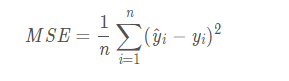

范围[ 0,+∞），当预测值与真实值完全相同时为0，误差越大，该值越大。

采用自定义损失函数--通过继承损失函数的基类nn.LossBase来定义损失函数。

nn.LossBase在nn.Cell的基础上，提供了get_loss方法，利用reduction参数对损失值求和或求均值，输出一个标量。

In [38]:
import numpy as np
import mindspore.nn as nn
import mindspore.ops as ops
from mindspore import Tensor

class MSELoss(nn.LossBase):  
    # """自定义损失函数MSEloss"""
    
    def __init__(self,reduction="mean"):
        # """完成初始化并求loss的均值"""
        
        super(MSELoss, self).__init__(reduction)
        self.square = ops.Square()    # """求平方算子"""
    
    def construct(self, base, target):
        x = self.square(self.square(base - target))   # """求平方运算"""
        return  self.get_loss(x) 
        # """返回loss的均值"""
loss = MSELoss()

input_data = Tensor(np.array([0.1, 0.2, 0.3]).astype(np.float32))  # 生成预测值
target_data = Tensor(np.array([0.1, 0.2, 0.2]).astype(np.float32)) # 生成真实值

output = loss(input_data, target_data)
print(output)

3.3333345e-05
